In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Here we consider the fractional riccati equation with fractional derivative, but here intended as conformable

# We use 3 layers with one hidden node

Moreover, we define the solution to the Riccati $$y_N := xN$$, where $N$ is the neural network,. Note that in such a way, the initial condition of the Riccati is automatically satisfied (see below). Moreover, in the main paper we found $a_0=0$ in the series expansion, and this automatically satisfies it.

$$D^\alpha y_N = \lambda y_N^2 + \mu y_N + \nu $$

with initial condition

$$I_{1-\alpha} y_N(0) = 0 $$

Where $I_\alpha$ defined as in the main paper (riemannliouv)

We consider interval $(0,1/252)$, with $T=\frac{1}{252}$.

We try to replicate the example in the paper, with 
$$\alpha = 0.64, \lambda = 0.045, \mu = -64.938, \nu = 44850 $$

We have $$f(x,y_N(x,\Omega)) = \lambda y_N^2 + \mu y_N + \nu $$

And The loss

$$ E[\Omega] = \sum_{i=1}^n [D^\alpha y_N(x_i,\Omega) - f]^2 $$

$$N(x,\Omega) = \sum_{j=1}^5 v_j\phi(w_jx+u_j) $$

$$ D_x^\alpha (N) := D_x^\alpha N(x,\Omega) = \sum_{j=1}^5 v_j \phi'(w_jx+u_j)w_jx^{1-\alpha} $$

$$D_x^\alpha y_N(x,\Omega) = D_x^\alpha (xN) = x^{1-\alpha}N + xD_x^\alpha (N) $$

In [2]:
T = 1/252
alp = 0.64
lamb = 0.2
mu = -1
nu = 2

In [3]:
def sigm_fun(x):
    return 1/(1+np.exp(-x))

def phi_prime(z): #1st derivative
    result = np.exp(-z)/((1+np.exp(-z))**2)
    return result

def phi_second(z): #2nd derivative
    first_addend = -np.exp(-z)/((1+np.exp(-z))**2)
    second_addend = 2*np.exp(-2*z)/((1+np.exp(-z))**3)
    return first_addend + second_addend

# Usa *args, come input e spacchetta

def compute_neural_network(x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    ''' NN '''
    result = v0*sigm_fun(w0*x+u0)
    result += v1*sigm_fun(w1*x+u1)
    result += v2*sigm_fun(w2*x+u2)
    result += v3*sigm_fun(w3*x+u3)
    result += v4*sigm_fun(w4*x+u4)
    return result


np.random.seed(10)
weights = np.random.uniform(low=-10, high=10, size=(15,))
v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = weights
print(weights)

[ 5.42641287 -9.58496101  2.6729647   4.97607765 -0.02985975 -5.50406709
 -6.0387427   5.21061424 -6.61778327 -8.23320372  3.70719637  9.06786692
 -9.92103467  0.24384527  6.25241923]


In [4]:
def der_alpha_y_N(x,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4): # Depends on the fDe

    first_addend = x**(1-alp)*compute_neural_network(x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

    def der_alpha_N(alp,x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):

        tot_sum = v0*phi_prime(w0*x+u0)*w0*x**(1-alp)
        tot_sum += v1*phi_prime(w1*x+u1)*w1*x**(1-alp)
        tot_sum += v2*phi_prime(w2*x+u2)*w2*x**(1-alp)
        tot_sum += v3*phi_prime(w3*x+u3)*w3*x**(1-alp)
        tot_sum += v4*phi_prime(w4*x+u4)*w4*x**(1-alp)

        return tot_sum

    second_addend = x*der_alpha_N(alp,x,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

    return first_addend + second_addend

In [5]:
def y_n(x,*weights):
    return x*compute_neural_network(x,*weights)
y_n(2,*(v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

2.434350776822021

In [6]:
def f_x_i_y_N(x,*weights):
    
    yn = y_n(x,*weights)
    return lamb*yn**2 + mu*yn + nu

f_x_i_y_N(2,*(v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

0.7508619641007745

# Compute E

In [7]:
points_to_evaluate = np.linspace(0,T,50)

def E(alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate): #E[weights]
    ''' 
    returns the value of E, knowing 
    alpha, weights of the NN, and the points_to_evaluate.
    '''
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    def addend_in_E_w(x,alp,*weights):
        
        return (der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights))**2
    
    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_w(x,alp,*weights)
    
    return tot_sum

E(0.6,*weights)

225.8388382434742

# Compute Derivative Of E wrt Weights

It is similar to the first example of Mall, only add $\frac{\partial f}{\partial weights}$. 

We know that 
$$ N=\sum_{j=1}^5 v_j \phi(w_jx+u_j)$$

So that

$$ \frac{\partial N}{\partial w_k} =  v_k \phi'(w_kx+u_k)x $$
$$ \frac{\partial N}{\partial v_k} =  \phi(w_kx+u_k) $$
$$ \frac{\partial N}{\partial u_k} =  v_k \phi'(w_kx+u_k)$$

### Derivative of N wrt to weights

In [8]:
def der_N_wrt_wj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    if j==0:
        return v0*phi_prime(w0*x+u0)*x
    if j==1:
        return v1*phi_prime(w1*x+u1)*x
    if j==2:
        return v2*phi_prime(w2*x+u2)*x
    if j==3:
        return v3*phi_prime(w3*x+u3)*x
    if j==4:
        return v4*phi_prime(w4*x+u4)*x
    
def der_N_wrt_vj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    if j==0:
        return sigm_fun(w0*x+u0)
    if j==1:
        return sigm_fun(w1*x+u1)
    if j==2:
        return sigm_fun(w2*x+u2)
    if j==3:
        return sigm_fun(w3*x+u3)
    if j==4:
        return sigm_fun(w4*x+u4)
    
def der_N_wrt_uj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    if j==0:
        return v0*phi_prime(w0*x+u0)
    if j==1:
        return v1*phi_prime(w1*x+u1)
    if j==2:
        return v2*phi_prime(w2*x+u2)
    if j==3:
        return v3*phi_prime(w3*x+u3)
    if j==4:
        return v4*phi_prime(w4*x+u4)

Moreover, 

$$ f = \lambda y_N^2 + \mu y_N + \nu = \lambda (xN)^2 + \mu (xN) + \nu$$

Thus

$$ \frac{\partial f}{\partial weight} = \lambda 2 x^2 N \frac{\partial N}{\partial weight} + \mu x \frac{\partial N}{\partial weight} $$ 
And these $\frac{\partial N}{\partial weight}$ we just wrote above

### Derivative of $f$ wrt to weights

In [9]:
def der_f_wrt_wj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    first_addend = lamb*2*x**2*compute_neural_network(x,*weights)*der_N_wrt_wj(x,j,*weights)
    second_addend = mu*x*der_N_wrt_wj(x,j,*weights)
    
    return first_addend + second_addend

der_f_wrt_wj(0.4,3,*weights)

-0.10652673305818114

In [10]:
def der_f_wrt_vj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    first_addend = lamb*2*x**2*compute_neural_network(x,*weights)*der_N_wrt_vj(x,j,*weights)
    second_addend = mu*x*der_N_wrt_vj(x,j,*weights)
    
    return first_addend + second_addend

der_f_wrt_vj(0.4,3,*weights)

-0.058358760647241256

In [11]:
def der_f_wrt_uj(x,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    first_addend = lamb*2*x**2*compute_neural_network(x,*weights)*der_N_wrt_uj(x,j,*weights)
    second_addend = mu*x*der_N_wrt_uj(x,j,*weights)
    
    return first_addend + second_addend

der_f_wrt_uj(0.4,3,*weights)

-0.2663168326454528

## Derivative of E wrt weights

$$\frac{\partial E[weights]}{\partial w_k} = \sum_{j=1}^{10} 2[D^\alpha y_N(x_i,weights) - f(x_i, y_N(x_i,weights))] [\frac{\partial D^\alpha y_N}{\partial w_k}-\frac{\partial f}{\partial w_k}]$$

In [12]:
def der_E_wrt_wj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    def addend_in_E_wrt_wj(x,j,alp,*weights):
        
        def der_D_alpha_y_N_wrt_wj(j):
            if j==0:
                first_addend = x**(2-alp)*v0*phi_prime(w0*x+u0)
                second_addend = v0*x**(2-alp)*(phi_prime(w0*x+u0) + phi_second(w0*x+u0)*w0*x)
            if j==1:
                first_addend = x**(2-alp)*v1*phi_prime(w1*x+u1)
                second_addend = v1*x**(2-alp)*(phi_prime(w1*x+u1) + phi_second(w1*x+u1)*w1*x)
            if j==2:
                first_addend = x**(2-alp)*v2*phi_prime(w2*x+u2)
                second_addend = v2*x**(2-alp)*(phi_prime(w2*x+u2) + phi_second(w2*x+u2)*w2*x)
            if j==3:
                first_addend = x**(2-alp)*v3*phi_prime(w3*x+u3)
                second_addend = v3*x**(2-alp)*(phi_prime(w3*x+u3) + phi_second(w3*x+u3)*w3*x)
            if j==4:
                first_addend = x**(2-alp)*v4*phi_prime(w4*x+u4)
                second_addend = v4*x**(2-alp)*(phi_prime(w4*x+u4) + phi_second(w4*x+u4)*w4*x)
                
            return first_addend + second_addend
        
        first_factor = der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights)
        second_factor = der_D_alpha_y_N_wrt_wj(j)-der_f_wrt_wj(x,j,*weights)
        
        return 2*first_factor*second_factor

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_wj(x,j,alp,*weights)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> w2

j = 1
print("this is the derivative of E wrt to w%d, evaluated"%j,
     der_E_wrt_wj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to w1, evaluated 0.00017096397732572745


In [13]:
def der_E_wrt_vj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    def addend_in_E_wrt_vj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
        
        def der_D_alpha_y_N_wrt_vj(j):
            if j==0:
                first_addend = x**(1-alp)*sigm_fun(w0*x+u0)
                second_addend = w0*x**(2-alp)*phi_prime(w0*x+u0)
            if j==1:
                first_addend = x**(1-alp)*sigm_fun(w1*x+u1)
                second_addend = w1*x**(2-alp)*phi_prime(w1*x+u1)
            if j==2:
                first_addend = x**(1-alp)*sigm_fun(w2*x+u2)
                second_addend = w2*x**(2-alp)*phi_prime(w2*x+u2)
            if j==3:
                first_addend = x**(1-alp)*sigm_fun(w3*x+u3)
                second_addend = w3*x**(2-alp)*phi_prime(w3*x+u3)
            if j==4:
                first_addend = x**(1-alp)*sigm_fun(w4*x+u4)
                second_addend = w4*x**(2-alp)*phi_prime(w4*x+u4)

            return first_addend + second_addend
        
        first_factor = der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights)
        second_factor = der_D_alpha_y_N_wrt_vj(j)-der_f_wrt_vj(x,j,*weights)
    
        return 2*first_factor*second_factor

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_vj(x,j,alp,*weights)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> v2

j = 4
print("this is the derivative of E wrt to v%d, evaluated"%j,
     der_E_wrt_vj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to v4, evaluated -32.98931445543874


In [14]:
def der_E_wrt_uj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' As input, exactly the parameters of the function E'''
    
    def addend_in_E_wrt_uj(x,j,alp,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):

        def der_D_alpha_y_N_wrt_uj(j):
            if j==0:
                first_addend = x**(1-alp)*v0*phi_prime(w0*x+u0)
                second_addend = w0*v0*x**(2-alp)*phi_second(w0*x+u0)
            if j==1:
                first_addend = x**(1-alp)*v1*phi_prime(w1*x+u1)
                second_addend = w1*v1*x**(2-alp)*phi_second(w1*x+u1)
            if j==2:
                first_addend = x**(1-alp)*v2*phi_prime(w2*x+u2)
                second_addend = w2*v2*x**(2-alp)*phi_second(w2*x+u2)
            if j==3:
                first_addend = x**(1-alp)*v3*phi_prime(w3*x+u3)
                second_addend = w3*v3*x**(2-alp)*phi_second(w3*x+u3)
            if j==4:
                first_addend = x**(1-alp)*v4*phi_prime(w4*x+u4)
                second_addend = w4*v4*x**(2-alp)*phi_second(w4*x+u4)

            return first_addend + second_addend
        
        first_factor = der_alpha_y_N(x,alp,*weights) - f_x_i_y_N(x,*weights)
        second_factor = der_D_alpha_y_N_wrt_uj(j)-der_f_wrt_uj(x,j,*weights)
    
        return 2*first_factor*second_factor

    tot_sum = 0
    for x in points_to_evaluate:
        tot_sum += addend_in_E_wrt_uj(x,j,alp,*weights)
    
    return tot_sum

# alpha = 0.5, let's derive wrt. j=2 ---> u2

j = 0
print("this is the derivative of E wrt to u%d, evaluated"%j,
     der_E_wrt_uj(0.7,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4))

this is the derivative of E wrt to u0, evaluated -4.295812889591501


# Update the weights

In [15]:
def update_weights(alp,h,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4,points_to_evaluate=points_to_evaluate):
    ''' Inputs: alpha, h=learning_rate, Omega, points_to_evaluate.
        Output: E, and new weights'''
    
    old_weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    new_weights = [np.nan]*15  # new weights = [v0',v1',v2',v3',v4',w0',w1',w2',w3',w4',u0',u1',u2',u3',u4']
    for j in [0,1,2,3,4]:
        vj_new = old_weights[j] - h*der_E_wrt_vj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        wj_new = old_weights[5+j] - h*der_E_wrt_wj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        uj_new = old_weights[10+j] - h*der_E_wrt_uj(alp,j,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        
        new_weights[j] = vj_new
        new_weights[j+5] = wj_new
        new_weights[j+10] = uj_new
    
    #print("old weights = ", old_weights, "\n")
    #print("new weights = ", new_weights, "\n")
    
    # Old Value of E and New value
    old_val_E = E(alp,*old_weights)
    new_val_E = E(alp,*new_weights)
    #print("old_value_of_E = ", old_val_E)
    #print("new_value_of_E = ", new_val_E)
    
    return new_weights, new_val_E, old_val_E

In [16]:
learn_rate = 0.2
alp = 0.64

update_weights(alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)

([9.737366522290369,
  -5.16598669305339,
  2.6731871121566697,
  7.420526130559232,
  4.380815206341039,
  -5.501413923265362,
  -6.038765887428013,
  5.210616989214224,
  -6.59263550502185,
  -8.233204929318697,
  4.281738923016362,
  9.06284514896945,
  -9.920440199574386,
  5.679875148168944,
  6.252156296093084],
 18.819657370028175,
 233.255679574629)

In [17]:
def iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4):
    
    weights = [v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4]
    
    weights_df = pd.DataFrame(data = {"E/Loss function": E(alp,*weights), 
                                  "weights": [weights]})
    
    for i in range(nr_iterations):
        weights, new_E, old_E = update_weights(alp,learn_rate,*weights)
        
        new_weights_df = pd.DataFrame(data = {"E/Loss function": new_E, 
                                  "weights": [weights]})
        
        weights_df = weights_df.append(new_weights_df)
    
    weights_df.index = list(range(0,nr_iterations+1))
    weights_df.index = weights_df.index.rename("iteration")
    
    return weights_df

# Problem!!! With the parameters as in the paper, it doesn't bring results, because there is overflow of numbers

In [18]:
learn_rate = 0.04
nr_iterations = 50

np.random.seed(3)
sampl = np.random.uniform(low=-1, high=2, size=(15,))
v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = sampl


final_df = iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
final_df


,E/Loss function,weights
iteration,,
0,157.270763,"[0.6523937077237265, 1.1244434678543147, -0.12..."
1,132.601068,"[0.8577119940533213, 1.544984808988296, 0.3853..."
2,108.907136,"[1.0596891693640027, 1.926601443747802, 0.8506..."
3,88.630385,"[1.2542863572612442, 2.2667317174362336, 1.265..."
4,72.452330,"[1.4393698961431518, 2.566888903816525, 1.6319..."
5,59.793702,"[1.614278813983534, 2.8308843112654083, 1.9543..."
6,49.904885,"[1.7787972499997713, 3.062715086686798, 2.2375..."
7,42.177155,"[1.9327680405510563, 3.2659349234589237, 2.485..."
8,36.146921,"[2.0760482411294907, 3.443642814518906, 2.7031..."


In [23]:
def testing_many_seeds(nr_seeds):
    
    for i in range(1,nr_seeds):
        np.random.seed(i)
        sampl = np.random.uniform(low=-1, high=3, size=(15,))
        v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4 = sampl

        final_df = iterate_updation_of_weights(nr_iterations,alp,learn_rate,v0,v1,v2,v3,v4,w0,w1,w2,w3,w4,u0,u1,u2,u3,u4)
        # final_df.to_csv('results_from_tests/best_results_example1_paper_alpha05.csv')
        # final_df = pd.read_csv('results_from_tests/best_results_example1_paper_alpha05.csv')

        error = final_df.iloc[-1,0]
        print("for i =", i, "we got error =", error)


        if i == 1:
            best_error = error
            best_index = 1
        if i >= 1:
            if best_error >= error:
                best_error = error
                best_index = i

    return best_index, best_error

testing_many_seeds(100)

for i = 1 we got error = 16.977624415263293
for i = 2 we got error = 16.986206589097467
for i = 3 we got error = 16.976441009325747
for i = 4 we got error = 16.99311775820518
for i = 5 we got error = 16.992016138122395
for i = 6 we got error = 16.99131694338619
for i = 7 we got error = 16.986833773357862
for i = 8 we got error = 16.986645415253864


KeyboardInterrupt: 

In [19]:
final_weights = final_df.weights.iloc[-1]
final_weights

[3.0641873497140226,
 4.40067768401828,
 3.874124083551623,
 5.415476025247805,
 5.769875032989906,
 1.6938036716075766,
 -0.6228784667861778,
 -0.38081827622945236,
 -0.8440510989306419,
 0.3233733028296939,
 4.835054189239875,
 0.3202819238913336,
 0.9533768815175125,
 54.19576065247799,
 1.026135336448514]

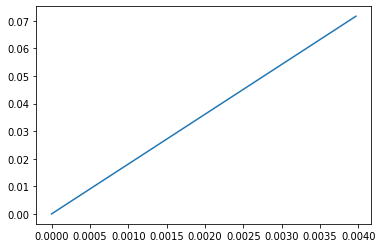

In [20]:
x = np.linspace(0,T,50)
y = [i*compute_neural_network(i,*final_weights) for i in x]
plt.plot(x,y)

### Next, use again the notebook on the Euler method on these parameters, because it doesn't end well with other parameters, overflow of numbers! And Compare!

# Comparison

In [21]:
euler_df = pd.read_csv('results_from_tests/for_test_conformable_nn.csv').set_index('time')
euler_df.head()

,value
time,
0.000000,0.000000
0.000124,0.007018
0.000248,0.010921
0.000372,0.014140
0.000496,0.016982


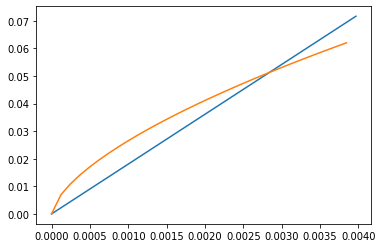

In [22]:
x = euler_df.index
y_neural_net = [i*compute_neural_network(i,*final_weights) for i in x]
plt.plot(x,y_neural_net)

y_euler = euler_df.value
plt.plot(x,y_euler)

#For the Conformable Riccati Equation!!, Know that, in this Euler Scheme, 
#t_k0 was too big. Means that we only used the fractional power series. 
#The Euler scheme, which is applied after the line tk0, is too big